Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
# function to get listing
def get_listings(api_key, listing_url):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/listing"

    querystring = {
        "api_key": api_key,
        "url":listing_url
    }
    return requests.request("GET", url, params=querystring)

In [6]:
#set API key
api_key = "32e8f175-b2f1-4ddf-9af4-3717f148eeae"

#lookup zillow website and copy/pasta the search listing url
listing_url = "https://www.zillow.com/mesa-az/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A33.581965545767794%2C%22east%22%3A-111.46790181542967%2C%22south%22%3A33.24552514620347%2C%22west%22%3A-112.0076051845703%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22price%22%3A%7B%22min%22%3A0%7D%2C%22mp%22%3A%7B%22min%22%3A0%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22category%22%3A%22cat1%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A19331%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%2C%22mapZoom%22%3A11%7D"

In [7]:
listing_response =  get_listings(api_key, listing_url)

In [8]:
listing_response.json().keys()

dict_keys(['is_success', 'data', 'message'])

In [9]:
#check if request is successful
listing_response.json()["is_success"]

True

In [20]:
listing_response.json()["data"]["cat1"]

{'searchResults': {'listResults': [{'zpid': '7673682',
    'id': '7673682',
    'providerListingId': None,
    'imgSrc': 'https://photos.zillowstatic.com/fp/83429d824c476da9245d9caab0652f18-p_e.jpg',
    'hasImage': True,
    'carouselPhotos': [{'url': 'https://photos.zillowstatic.com/fp/83429d824c476da9245d9caab0652f18-p_e.jpg'},
     {'url': 'https://photos.zillowstatic.com/fp/eb6430088ee9b1bd1f625f73985f3290-p_e.jpg'},
     {'url': 'https://photos.zillowstatic.com/fp/37f3b42d5e780423190485dc33da7689-p_e.jpg'},
     {'url': 'https://photos.zillowstatic.com/fp/84ccfc056095f273f068b80e201bd9b9-p_e.jpg'},
     {'url': 'https://photos.zillowstatic.com/fp/1f24604d426454005ea246b0fc0b89b9-p_e.jpg'},
     {'url': 'https://photos.zillowstatic.com/fp/764d951b970dc55eb91b492720316594-p_e.jpg'},
     {'url': 'https://photos.zillowstatic.com/fp/1058f27c31a113bf7734327ebda8071b-p_e.jpg'},
     {'url': 'https://photos.zillowstatic.com/fp/4bdb958d8dac8f610cddad4b9ccbf2f9-p_e.jpg'},
     {'url': 'ht

In [29]:

listing_response.json()["data"]["cat1"]["searchResults"].keys()

dict_keys(['listResults', 'resultsHash', 'homeRecCount', 'showForYouCount', 'mapResults', 'relaxedResults', 'relaxedResultsHash'])

In [24]:
#view all listings
df_listings = pd.json_normalize(listing_response.json()["data"]["cat1"]["searchResults"]["mapResults"])
print("number of rows:" , len(df_listings))
print("number of columns:" , len(df_listings.columns))
df_listings

number of rows: 503
number of columns: 95


,zpid,price,priceLabel,beds,baths,area,statusType,statusText,isFavorite,isUserClaimingOwner,...,lotAreaString,communityName,hdpData.homeInfo.providerListingID,isPropertyResultCDP,style,isCdpResult,hdpData.homeInfo.group_type,hdpData.homeInfo.priceSuffix,streetViewMetadataURL,streetViewURL
0,7673682,"$541,000",$541K,6.0,3.0,2950.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8278483,"$600,000",$600K,4.0,2.0,2303.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7617774,"$899,000",$899K,5.0,3.0,3881.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7670803,"$634,900",$635K,4.0,3.0,2386.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8075002,"$436,000",$436K,3.0,2.0,1157.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,71492075,"$429,000",$429K,3.0,3.0,1821.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,8068924,"$214,900",$215K,2.0,2.0,1056.0,FOR_SALE,Home for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,"From $552,990",NaN,NaN,NaN,NaN,FOR_SALE,NaN,NaN,NaN,...,NaN,K. Hovnanian's Four Seasons at Victory at Verrado,NaN,NaN,Adult,True,NaN,NaN,NaN,NaN
501,NaN,"From $480,990",NaN,NaN,NaN,NaN,FOR_SALE,NaN,NaN,NaN,...,NaN,La Mira Discovery Collection,NaN,NaN,None,True,NaN,NaN,NaN,NaN


In [25]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 95 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   zpid                                                 435 non-null    object 
 1   price                                                503 non-null    object 
 2   priceLabel                                           435 non-null    object 
 3   beds                                                 431 non-null    float64
 4   baths                                                432 non-null    float64
 5   area                                                 431 non-null    float64
 6   statusType                                           503 non-null    object 
 7   statusText                                           500 non-null    object 
 8   isFavorite                                           500 non-null    o

# cleaning data

In [46]:
#filtering only data i want
coldata =["hdpData.homeInfo.price","hdpData.homeInfo.bedrooms","hdpData.homeInfo.bathrooms","area","hdpData.homeInfo.latitude","hdpData.homeInfo.longitude","hdpData.homeInfo.zipcode","hdpData.homeInfo.city","hdpData.homeInfo.state"]




In [47]:
df_filtered = df_listings.loc[:,coldata]
df_filtered

,hdpData.homeInfo.price,hdpData.homeInfo.bedrooms,hdpData.homeInfo.bathrooms,area,hdpData.homeInfo.latitude,hdpData.homeInfo.longitude,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state
0,541000.0,6.0,3.0,2950.0,33.438236,-111.777410,85213,Mesa,AZ
1,600000.0,4.0,2.0,2303.0,33.360455,-111.613130,85212,Mesa,AZ
2,899000.0,5.0,3.0,3881.0,33.444103,-111.791046,85203,Mesa,AZ
3,634900.0,4.0,3.0,2386.0,33.480490,-111.689210,85215,Mesa,AZ
4,436000.0,3.0,2.0,1157.0,33.380450,-111.678505,85209,Mesa,AZ
...,...,...,...,...,...,...,...,...,...
498,429000.0,3.0,3.0,1821.0,33.385254,-111.614020,85209,Mesa,AZ
499,214900.0,2.0,2.0,1056.0,33.409000,-111.669550,85208,Mesa,AZ
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hdpData.homeInfo.price      435 non-null    float64
 1   hdpData.homeInfo.bedrooms   431 non-null    float64
 2   hdpData.homeInfo.bathrooms  432 non-null    float64
 3   area                        431 non-null    float64
 4   hdpData.homeInfo.latitude   435 non-null    float64
 5   hdpData.homeInfo.longitude  435 non-null    float64
 6   hdpData.homeInfo.zipcode    435 non-null    object 
 7   hdpData.homeInfo.city       435 non-null    object 
 8   hdpData.homeInfo.state      435 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.5+ KB


In [49]:
# drop all the rows that have non-NaN values.
df_filtered.dropna(inplace=True)
df_filtered

,hdpData.homeInfo.price,hdpData.homeInfo.bedrooms,hdpData.homeInfo.bathrooms,area,hdpData.homeInfo.latitude,hdpData.homeInfo.longitude,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state
0,541000.0,6.0,3.0,2950.0,33.438236,-111.777410,85213,Mesa,AZ
1,600000.0,4.0,2.0,2303.0,33.360455,-111.613130,85212,Mesa,AZ
2,899000.0,5.0,3.0,3881.0,33.444103,-111.791046,85203,Mesa,AZ
3,634900.0,4.0,3.0,2386.0,33.480490,-111.689210,85215,Mesa,AZ
4,436000.0,3.0,2.0,1157.0,33.380450,-111.678505,85209,Mesa,AZ
...,...,...,...,...,...,...,...,...,...
495,949000.0,4.0,4.0,3248.0,33.484356,-111.674675,85207,Mesa,AZ
496,1499900.0,4.0,4.0,5154.0,33.479410,-111.656166,85207,Mesa,AZ
497,339900.0,2.0,2.0,1294.0,33.397152,-111.662980,85208,Mesa,AZ
498,429000.0,3.0,3.0,1821.0,33.385254,-111.614020,85209,Mesa,AZ


In [50]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hdpData.homeInfo.price      431 non-null    float64
 1   hdpData.homeInfo.bedrooms   431 non-null    float64
 2   hdpData.homeInfo.bathrooms  431 non-null    float64
 3   area                        431 non-null    float64
 4   hdpData.homeInfo.latitude   431 non-null    float64
 5   hdpData.homeInfo.longitude  431 non-null    float64
 6   hdpData.homeInfo.zipcode    431 non-null    object 
 7   hdpData.homeInfo.city       431 non-null    object 
 8   hdpData.homeInfo.state      431 non-null    object 
dtypes: float64(6), object(3)
memory usage: 33.7+ KB


# Displaying

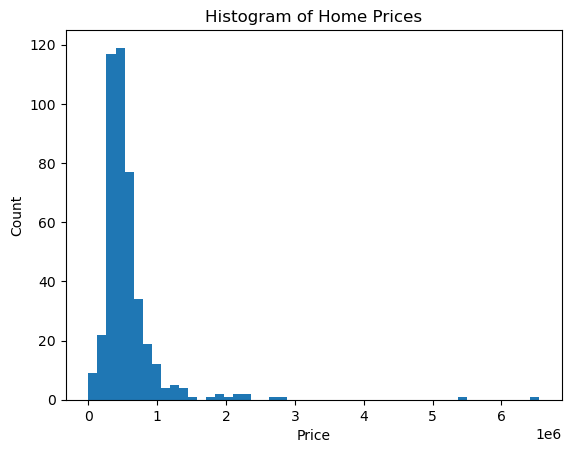

In [55]:
plt.hist(df_listings['hdpData.homeInfo.price'], bins=50)
plt.title('Histogram of Home Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

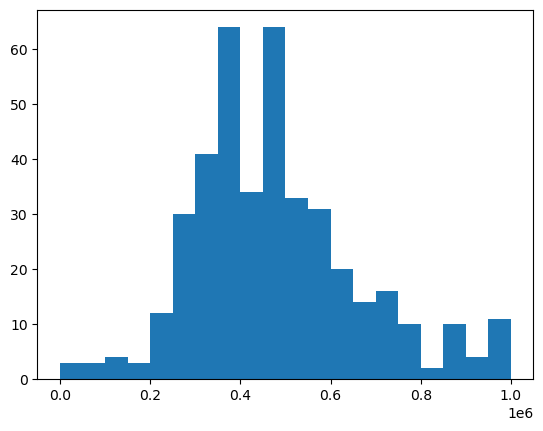

In [56]:
#display the range of prices of houses up till 1,000,000
prices = df_listings['hdpData.homeInfo.price']
plt.hist(prices, bins=20, range=(0, 1000000))
plt.show()

In [62]:
#mean prices of house in Mesa,AZ
df_listings['hdpData.homeInfo.price'].mean()

570485.0758620689

In [61]:
#median prices of house in Mesa,AZ
df_listings['hdpData.homeInfo.price'].median()


469000.0

<Axes: >

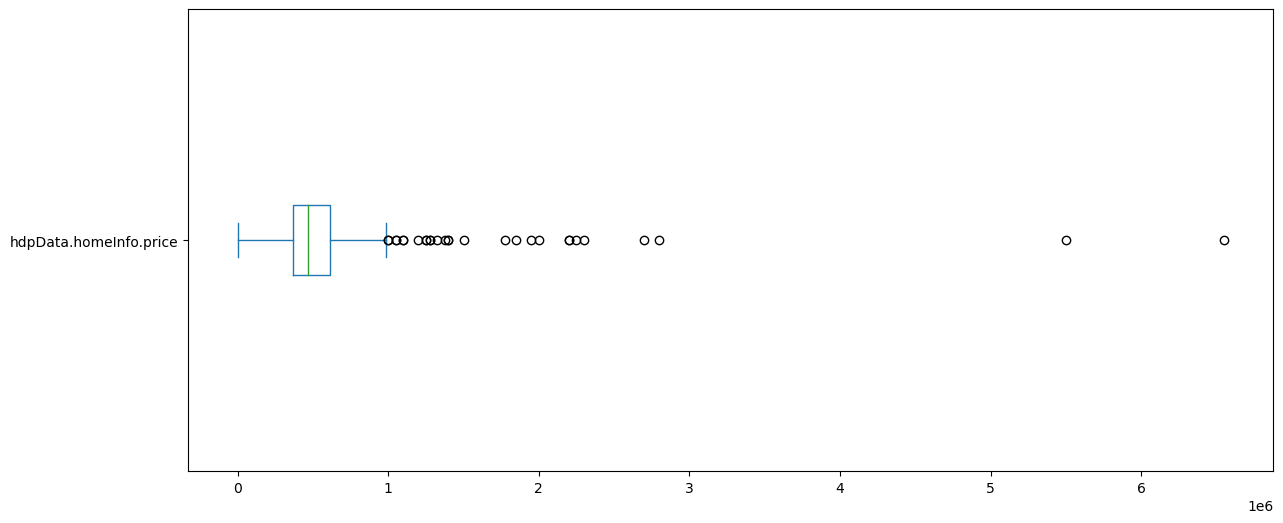

In [89]:
df_listings['hdpData.homeInfo.price'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

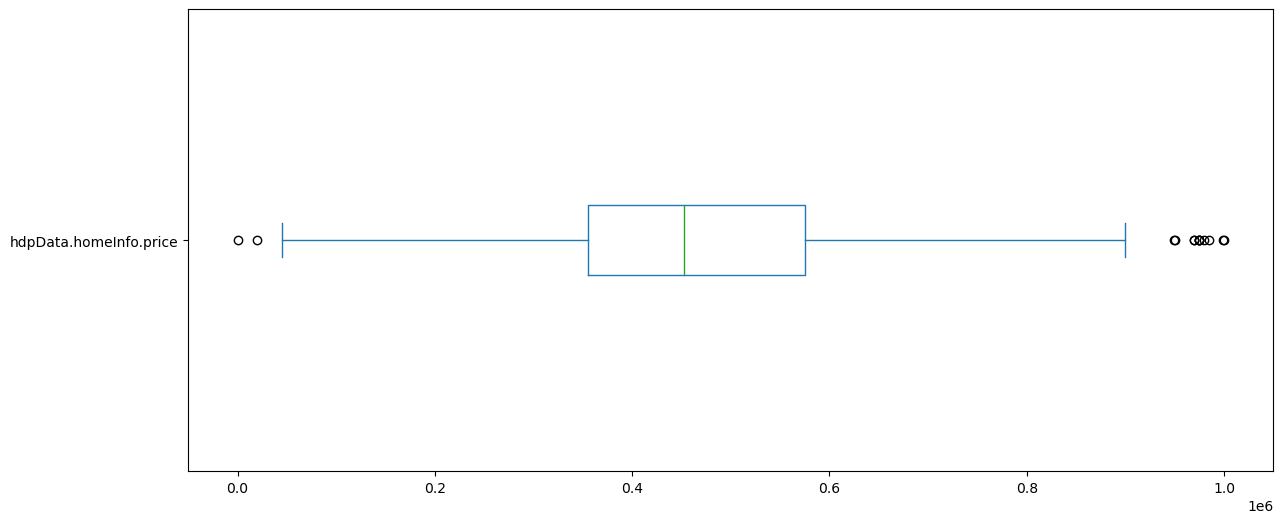

In [91]:
df_listings['hdpData.homeInfo.price'][df_listings['hdpData.homeInfo.price'] <= 1000000].plot(kind='box', vert=False, figsize=(14,6))

In [73]:
df_listings[['hdpData.homeInfo.price','hdpData.homeInfo.bedrooms','hdpData.homeInfo.bathrooms','area']].describe()

,hdpData.homeInfo.price,hdpData.homeInfo.bedrooms,hdpData.homeInfo.bathrooms,area
count,4.350000e+02,431.000000,432.000000,431.000000
mean,5.704851e+05,3.412993,2.604167,2178.846868
std,5.082640e+05,2.154761,1.592698,1541.292528
min,0.000000e+00,1.000000,0.000000,420.000000
25%,3.649500e+05,3.000000,2.000000,1427.000000
50%,4.690000e+05,3.000000,2.000000,1821.000000
75%,6.150000e+05,4.000000,3.000000,2509.000000
max,6.550000e+06,42.000000,28.000000,21980.000000


In [75]:
df1=df_listings[['hdpData.homeInfo.price','hdpData.homeInfo.bedrooms','hdpData.homeInfo.bathrooms','area']].copy()

In [76]:
df1

,hdpData.homeInfo.price,hdpData.homeInfo.bedrooms,hdpData.homeInfo.bathrooms,area
0,541000.0,6.0,3.0,2950.0
1,600000.0,4.0,2.0,2303.0
2,899000.0,5.0,3.0,3881.0
3,634900.0,4.0,3.0,2386.0
4,436000.0,3.0,2.0,1157.0
...,...,...,...,...
498,429000.0,3.0,3.0,1821.0
499,214900.0,2.0,2.0,1056.0
500,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN


In [77]:
df1.rename(columns={'hdpData.homeInfo.price': 'price', 'hdpData.homeInfo.bedrooms': 'bed', 'hdpData.homeInfo.bathrooms': 'bath',}, inplace=True)
df1

,price,bed,bath,area
0,541000.0,6.0,3.0,2950.0
1,600000.0,4.0,2.0,2303.0
2,899000.0,5.0,3.0,3881.0
3,634900.0,4.0,3.0,2386.0
4,436000.0,3.0,2.0,1157.0
...,...,...,...,...
498,429000.0,3.0,3.0,1821.0
499,214900.0,2.0,2.0,1056.0
500,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN


In [79]:
df1.dropna(inplace=True)
df1

,price,bed,bath,area
0,541000.0,6.0,3.0,2950.0
1,600000.0,4.0,2.0,2303.0
2,899000.0,5.0,3.0,3881.0
3,634900.0,4.0,3.0,2386.0
4,436000.0,3.0,2.0,1157.0
...,...,...,...,...
495,949000.0,4.0,4.0,3248.0
496,1499900.0,4.0,4.0,5154.0
497,339900.0,2.0,2.0,1294.0
498,429000.0,3.0,3.0,1821.0


In [80]:
df1['price_per_sqft']=df1['price']/df1['area']
df1

,price,bed,bath,area,price_per_sqft
0,541000.0,6.0,3.0,2950.0,183.389831
1,600000.0,4.0,2.0,2303.0,260.529744
2,899000.0,5.0,3.0,3881.0,231.641330
3,634900.0,4.0,3.0,2386.0,266.093881
4,436000.0,3.0,2.0,1157.0,376.836646
...,...,...,...,...,...
495,949000.0,4.0,4.0,3248.0,292.179803
496,1499900.0,4.0,4.0,5154.0,291.016686
497,339900.0,2.0,2.0,1294.0,262.673879
498,429000.0,3.0,3.0,1821.0,235.584843


In [84]:
# doing this shows us the "most bang for your buck" house
df1.sort_values('price_per_sqft')

,price,bed,bath,area,price_per_sqft
211,20000.0,1.0,1.0,420.0,47.619048
112,80000.0,3.0,2.0,1380.0,57.971014
485,45000.0,2.0,1.0,720.0,62.500000
121,59999.0,2.0,2.0,900.0,66.665556
126,50000.0,2.0,2.0,720.0,69.444444
...,...,...,...,...,...
180,2799000.0,6.0,7.0,6548.0,427.458766
88,2300000.0,5.0,7.0,5247.0,438.345721
287,2250000.0,5.0,5.0,5000.0,450.000000
23,679000.0,4.0,2.0,1508.0,450.265252


Looking at how the position of the house matter and their prices.

<Axes: xlabel='hdpData.homeInfo.longitude', ylabel='hdpData.homeInfo.latitude'>

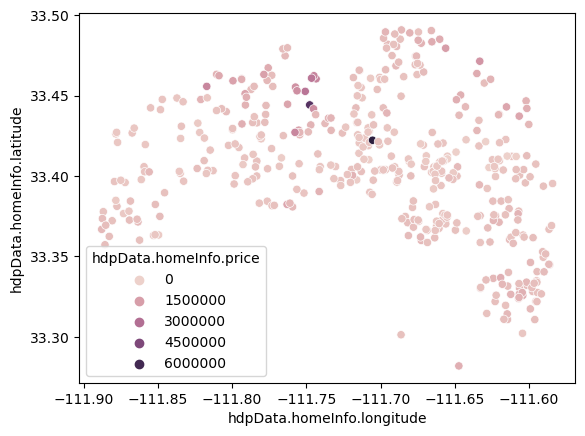

In [85]:
#this is hard to see because of the outlier price being too high
sns.scatterplot(x='hdpData.homeInfo.longitude', y='hdpData.homeInfo.latitude', hue='hdpData.homeInfo.price', data=df_listings)

In [87]:
df_listings[df_listings['hdpData.homeInfo.price']<= 1000000]

,zpid,price,priceLabel,beds,baths,area,statusType,statusText,isFavorite,isUserClaimingOwner,...,lotAreaString,communityName,hdpData.homeInfo.providerListingID,isPropertyResultCDP,style,isCdpResult,hdpData.homeInfo.group_type,hdpData.homeInfo.priceSuffix,streetViewMetadataURL,streetViewURL
0,7673682,"$541,000",$541K,6.0,3.0,2950.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8278483,"$600,000",$600K,4.0,2.0,2303.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7617774,"$899,000",$899K,5.0,3.0,3881.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7670803,"$634,900",$635K,4.0,3.0,2386.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8075002,"$436,000",$436K,3.0,2.0,1157.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,7665883,"$399,000",$399K,3.0,2.0,1882.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,71613460,"$949,000",$949K,4.0,4.0,3248.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,8077789,"$339,900",$340K,2.0,2.0,1294.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,71492075,"$429,000",$429K,3.0,3.0,1821.0,FOR_SALE,House for sale,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='hdpData.homeInfo.longitude', ylabel='hdpData.homeInfo.latitude'>

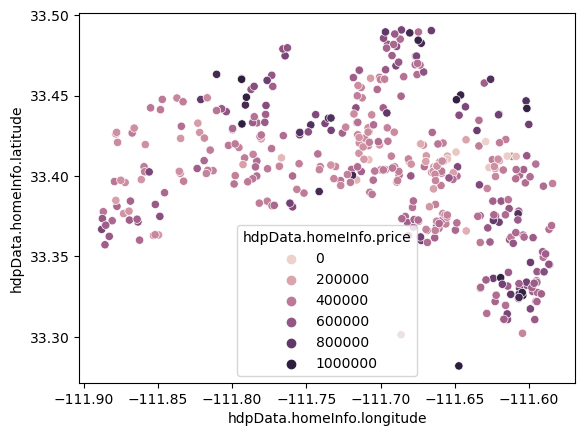

In [88]:
#plot a scatter which shows the geopositions of the homes and differenciate the price of the houses with hue
sns.scatterplot(x='hdpData.homeInfo.longitude', y='hdpData.homeInfo.latitude', hue='hdpData.homeInfo.price', data=df_listings[df_listings['hdpData.homeInfo.price']<= 1000000])

you are able to see a pattern here where similar home prices are clustered together. 

# practice linear regression
I want to explore the relationship between housing prices and its area, number of bedrooms, and number of bathrooms.

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
# Create a Linear Regression object
lr_model = LinearRegression()

In [94]:
#we will use this df of price,area,bed and bath
df1

,price,bed,bath,area,price_per_sqft
0,541000.0,6.0,3.0,2950.0,183.389831
1,600000.0,4.0,2.0,2303.0,260.529744
2,899000.0,5.0,3.0,3881.0,231.641330
3,634900.0,4.0,3.0,2386.0,266.093881
4,436000.0,3.0,2.0,1157.0,376.836646
...,...,...,...,...,...
495,949000.0,4.0,4.0,3248.0,292.179803
496,1499900.0,4.0,4.0,5154.0,291.016686
497,339900.0,2.0,2.0,1294.0,262.673879
498,429000.0,3.0,3.0,1821.0,235.584843


In [95]:
# Fit the model to the data
X = df1[['area', 'bed', 'bath']]
y = df1['price']
lr_model.fit(X, y)

LinearRegression()

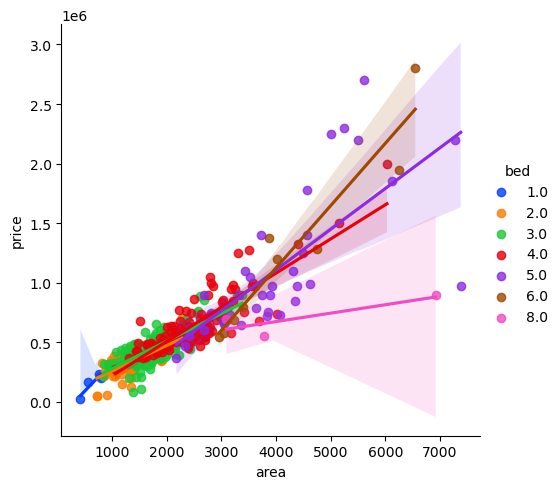

In [101]:
sns.lmplot(x='area', y='price', data=df1[df1['area']<=10000], hue='bed', palette='bright')

In [102]:
y_pred =lr_model.predict(X)

Text(0.5, 1.0, 'Actual vs. Predicted Prices')

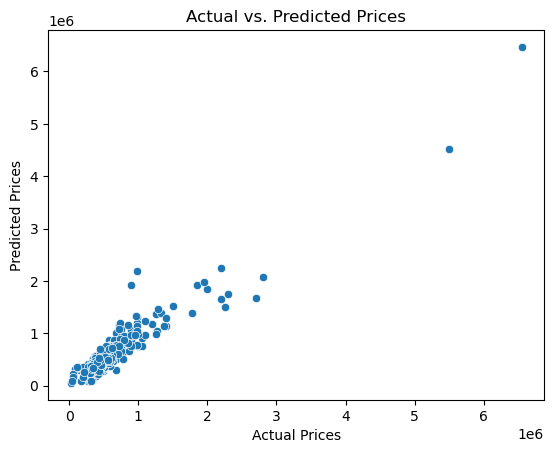

In [108]:
sns.scatterplot(x=y, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

<Axes: xlabel='area', ylabel='price'>

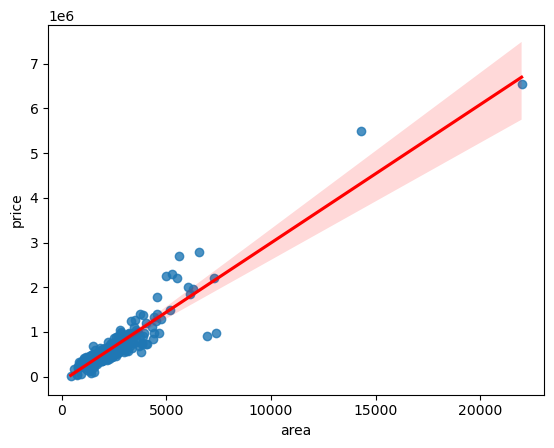

In [111]:
sns.regplot(x="area", y="price", data=df1, line_kws={"color": "red"})